<a href="https://colab.research.google.com/github/Rofa32/Kaust_intro1/blob/main/KAUST_intro2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


#not in scope of this course
from torchvision.datasets import MNIST
import torchvision.transforms as T
from torch.utils.data import DataLoader
import torch
import torch.nn as nn
from torchvision.datasets import MNIST
from torch.optim import Adam

from torchvision.transforms.functional import to_tensor

In [ ]:
train_dataset = MNIST("/", download = True, train = True, transform = T.ToTensor())
test_dataset = MNIST("/", download = True, train = False, transform = T.ToTensor())

In [ ]:
# Creating the data loaders for the training and test sets
trainloader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)

testloader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=True)

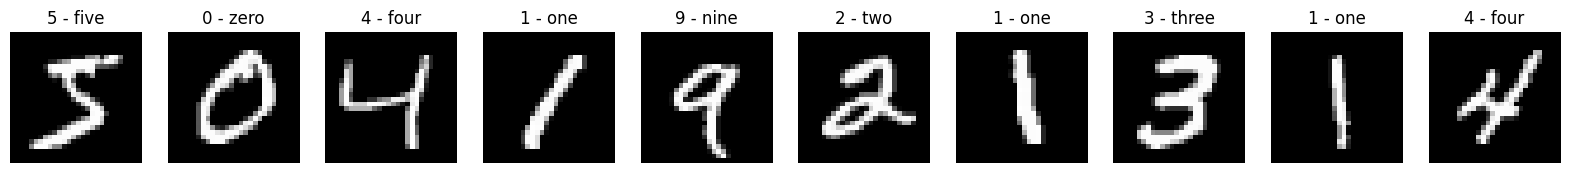

In [ ]:
# Visualize the data
images = []
labels = []

plt.figure(figsize=(20,20))

for i in range(10):
    images.append(train_dataset.data[i])
    labels.append(train_dataset.targets[i])
    plt.subplot(1,10,i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(train_dataset.classes[labels[i].item()])
    plt.axis('off')
plt.show()


In [ ]:
class MultiClassLogisticRegression:

    def fit(self, X, y, epochs=10, learning_rate= 0.001):
        self.classes = np.unique(y)
        self.class_labels = {c:i for i,c in enumerate(self.classes)}
        y=self.one_hot(y)

        self.loss = []

        #Defining A
        col = np.ones((X.shape[0], 1))
        A = np.concatenate((col, X), axis=1)


        self.weights = np.random.randn(len(self.classes), A.shape[1])

        for i in range(epochs):

            if self.score_(A, y) > 0.79:
              break
            self.loss.append(self.cross_entropy(y, self.predict_(A)))

            #here finding z and y_pred are combined in function: self.predict_(A)
            pred_y = self.predict_(A)

            gradient = (pred_y - y).T.dot(A)

            #Update weights
            self.weights -= gradient.dot(learning_rate)
            print(' Training Accuray at {} iterations is {}'.format(i+1, self.score_(A, y)))
        return self

    # To predict y_pred as one hot vectors
    def predict(self, X):
        col = np.ones((X.shape[0], 1))
        X = np.concatenate((col, X), axis =1)
        return self.predict_(X)


    def accuracy(self, X, y):
        predicted_classes = self.predict_classes(X)
        correct_predictions = np.sum(predicted_classes == y.numpy())  # Convert PyTorch tensor to NumPy array
        total_samples = len(y)
        accuracy = correct_predictions / total_samples
        return accuracy

    # finding z and y_pred
    def predict_(self, X):
        z = np.dot(X, self.weights.T).reshape(-1,len(self.classes))
        return self.softmax(z)

    def softmax(self, z):
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def cross_entropy(self, y, probs):
        epsilon = 1e-15
        clipped_probs = np.clip(probs, epsilon, 1 - epsilon)
        return (-1 / len(probs)) * (y * np.log(clipped_probs)).sum()

    # to predict y_pred as one value (i.e. not as one-hot vector)
    def predict_classes(self, X):
        return np.argmax(self.predict(X), axis=1)

    def one_hot(self, y):
        return np.eye(len(self.classes))[y.reshape(-1)]

    def score_(self, X, y):
        probs = self.predict_(X)
        return np.mean(np.argmax(probs, axis=1) == np.argmax(y, axis=1))


In [ ]:
#split for training and testing
X_train = train_dataset.data.numpy().reshape(train_dataset.data.shape[0], -1)
X_test = test_dataset.data.numpy().reshape(test_dataset.data.shape[0], -1)

In [ ]:
bs = 32

train_loader = DataLoader(train_dataset, batch_size = bs)
test_loader = DataLoader(test_dataset, batch_size = bs)

In [ ]:
#Initalize model
model = MultiClassLogisticRegression()

#train model
model.fit(X_train, train_dataset.targets, epochs=100, learning_rate= 1e-5)

 Training Accuray at 1 iterations is 0.3511
 Training Accuray at 2 iterations is 0.2912166666666667
 Training Accuray at 3 iterations is 0.3463833333333333
 Training Accuray at 4 iterations is 0.32511666666666666
 Training Accuray at 5 iterations is 0.5144
 Training Accuray at 6 iterations is 0.5261666666666667
 Training Accuray at 7 iterations is 0.52535
 Training Accuray at 8 iterations is 0.6048
 Training Accuray at 9 iterations is 0.61635
 Training Accuray at 10 iterations is 0.6128166666666667
 Training Accuray at 11 iterations is 0.6418833333333334
 Training Accuray at 12 iterations is 0.7036333333333333
 Training Accuray at 13 iterations is 0.7559666666666667
 Training Accuray at 14 iterations is 0.78755
 Training Accuray at 15 iterations is 0.7662666666666667
 Training Accuray at 16 iterations is 0.8080333333333334


In [ ]:
y_pred_as_onehot= model.predict(X_train)
print(y_pred_as_onehot[:5])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [ ]:
# Training Accuracy
accuracy_train = model.accuracy(torch.tensor(X_train), train_dataset.targets)
print("Training Accuracy: {}".format(accuracy_train))

Training Accuracy: 0.8080333333333334


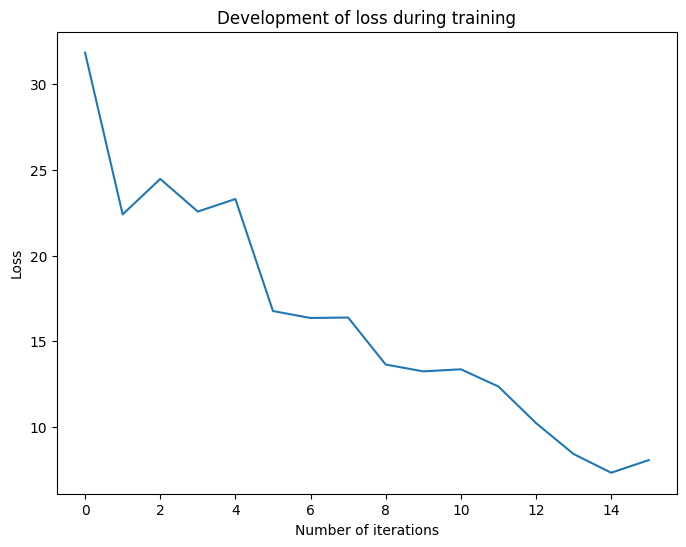

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,6))
plt.plot(np.arange(len(model.loss)), model.loss)
plt.title("Development of loss during training")
plt.xlabel("Number of iterations")
plt.ylabel("Loss")
plt.show()

In [ ]:
# Test Accuracy
accuracy_test = model.accuracy(torch.tensor(X_test), test_dataset.targets)
print(f"Test Accuracy: {accuracy_test}")

Test Accuracy: 0.8138


In [ ]:
model.loss

[31.844841229912294,
 22.40923023764063,
 24.478145152349306,
 22.575106181934206,
 23.30882439805639,
 16.771202522003524,
 16.363636500534657,
 16.391486397220206,
 13.647581966514174,
 13.249507195640382,
 13.370570035066883,
 12.36674003953039,
 10.23449139723408,
 8.426982009049304,
 7.334697436585761,
 8.070332512905235]

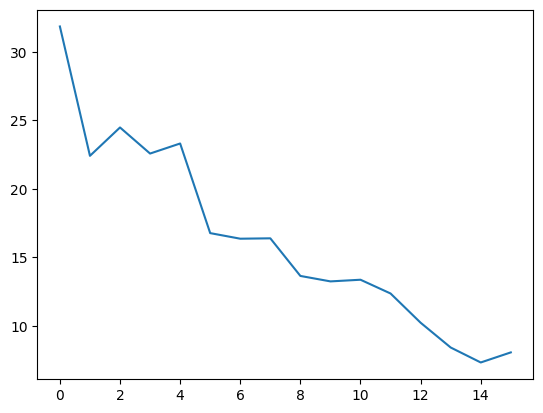

In [ ]:
plt.plot(model.loss)

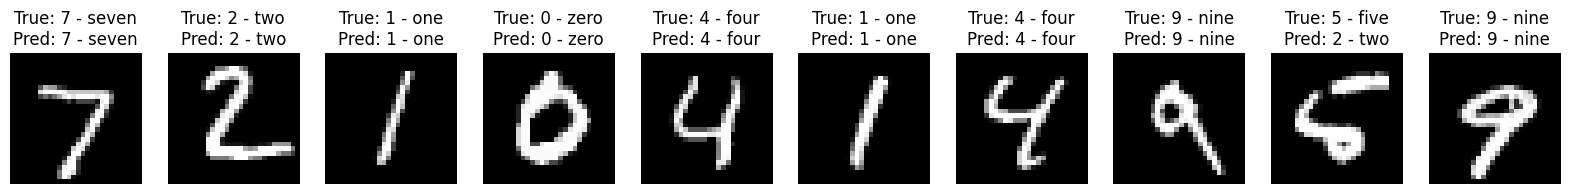

In [ ]:
images = []
labels = []
predictions = []

plt.figure(figsize=(20, 20))

for i in range(10):
    image = test_dataset.data[i].numpy().reshape(-1)  # Convert PyTorch tensor to NumPy array and flatten
    label = test_dataset.targets[i].item()
    predicted_label = model.predict_classes(image.reshape(1, -1))[0]

    images.append(image)
    labels.append(label)
    predictions.append(predicted_label)

    plt.subplot(1, 10, i + 1)
    plt.imshow(images[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {train_dataset.classes[labels[i]]}\nPred: {train_dataset.classes[predictions[i]]}")
    plt.axis('off')

plt.show()

#Tasks
#1) Train a logistic regression model using numpy (PyTorch or any other framework is not allowed)
#2) Implement the softmax layer
#3) Implement the cross entropy loss
#4) plot the training loss
#5) Show the test Accuracy
#6) Show a few incorrectly labelled samples